
# Loading the Dataset

In [23]:
import pandas as pd

# Path to the .csv file in your Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/kddcup99.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
print(df.head())


   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

In [24]:
ground_truth_cloumn= 'label'
ground_truth= df[ground_truth_cloumn]
print(ground_truth.unique())

['normal' 'buffer_overflow' 'loadmodule' 'perl' 'neptune' 'smurf'
 'guess_passwd' 'pod' 'teardrop' 'portsweep' 'ipsweep' 'land' 'ftp_write'
 'back' 'imap' 'satan' 'phf' 'nmap' 'multihop' 'warezmaster' 'warezclient'
 'spy' 'rootkit']


# It is essential to check whether there are missing values in dataset or not.

In [25]:
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
di

In [26]:
print(df.shape)

(494020, 42)


# Deleting the duplicate entries

In [27]:
# Check for duplicates
print(f"Total duplicates before dropping: {df.duplicated().sum()}")

# Drop duplicates
df_cleaned = df.drop_duplicates()

# Check the new shape of the dataset
print(f"Total entries after dropping duplicates: {df_cleaned.shape}")

Total duplicates before dropping: 348435
Total entries after dropping duplicates: (145585, 42)


In [28]:
# Exclude the target column from the list of categorical columns
categorical_columns = [col for col in df_cleaned.select_dtypes(include=['object']).columns if col != 'label']

# Separate numeric and categorical columns
numeric_columns = df_cleaned.select_dtypes(include=['int', 'float']).columns
print("Numeric columns:", numeric_columns)
print("Categorical columns:", categorical_columns)

Numeric columns: Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'lnum_compromised',
       'lroot_shell', 'lsu_attempted', 'lnum_root', 'lnum_file_creations',
       'lnum_shells', 'lnum_access_files', 'lnum_outbound_cmds',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')
Categorical columns: ['protocol_type', 'service', 'flag']


In [29]:
import pandas as pd
# List of numeric columns
numeric_columns = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                   'urgent', 'hot', 'num_failed_logins', 'logged_in', 'lnum_compromised',
                   'lroot_shell', 'lsu_attempted', 'lnum_root', 'lnum_file_creations',
                   'lnum_shells', 'lnum_access_files', 'lnum_outbound_cmds',
                   'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
                   'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
                   'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
                   'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                   'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                   'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

# Get unique values for each column
for col in numeric_columns:
    unique_values = df[col].unique()
    print(f"Column: {col}, Unique Values: {len(unique_values)}")

    # Display first 10 unique values
    print(f"Sample unique values in {col}: {unique_values[:10]}")
    print("-" * 40)


Column: duration, Unique Values: 2495
Sample unique values in duration: [  0   1  79 102   8   7   4 184 305 257]
----------------------------------------
Column: src_bytes, Unique Values: 3300
Sample unique values in src_bytes: [181 239 235 219 217 212 159 210 177 222]
----------------------------------------
Column: dst_bytes, Unique Values: 10725
Sample unique values in dst_bytes: [5450  486 1337 2032 1940 4087  151  786  624 1985]
----------------------------------------
Column: land, Unique Values: 2
Sample unique values in land: [0 1]
----------------------------------------
Column: wrong_fragment, Unique Values: 3
Sample unique values in wrong_fragment: [0 1 3]
----------------------------------------
Column: urgent, Unique Values: 4
Sample unique values in urgent: [0 2 1 3]
----------------------------------------
Column: hot, Unique Values: 22
Sample unique values in hot: [ 0  1  3 19  6  4 30 24 14 18]
----------------------------------------
Column: num_failed_logins, Unique

## As lnum_outbound_cmds and is_host_login these two features contains only one unique value repeated throughout the entries it doesn't signifies it's imporatant so we can remove these features.

In [30]:
import pandas as pd

# Dropping the columns with constant values
columns_to_drop = ['lnum_outbound_cmds', 'is_host_login']
df = df_cleaned.drop(columns=columns_to_drop)

# Verify the columns have been dropped
print("Columns after dropping:", df.columns)
df.shape


Columns after dropping: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')


(145585, 40)

In [31]:
df_features=df.drop(columns=['label'])
df_label=df['label']

# Scaling the numeric features and one-hot-encoding for categorical features

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Replace 'label' with your actual target column name if applicable
categorical_columns = [col for col in df_features.select_dtypes(include=['object']).columns]
numeric_columns = df_features.select_dtypes(include=['int', 'float']).columns

# Create preprocessing pipelines for numeric and categorical data
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())  # Scale numeric features
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first'))  # One-hot encode categorical features, drop the first category to avoid multicollinearity
])

# Combine preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('categorical', categorical_pipeline, categorical_columns)
])

# Apply preprocessing to the entire dataset
normalized_data = preprocessor.fit_transform(df)

# Get the names of the transformed features
numeric_feature_names = numeric_columns
categorical_feature_names = preprocessor.transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_columns)
all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=all_feature_names)

# Display the first few rows of the normalized DataFrame
print("Normalized data:")
print(normalized_df.head())


Normalized data:
   duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0 -0.107851  -0.004293   0.042595 -0.011722       -0.084394 -0.004737   
1 -0.107851  -0.004261  -0.039036 -0.011722       -0.084394 -0.004737   
2 -0.107851  -0.004263  -0.025042 -0.011722       -0.084394 -0.004737   
3 -0.107851  -0.004272  -0.025042 -0.011722       -0.084394 -0.004737   
4 -0.107851  -0.004273  -0.013613 -0.011722       -0.084394 -0.004737   

       hot  num_failed_logins  logged_in  lnum_compromised  ...  flag_REJ  \
0 -0.07021          -0.018022   1.017175         -0.007905  ...       0.0   
1 -0.07021          -0.018022   1.017175         -0.007905  ...       0.0   
2 -0.07021          -0.018022   1.017175         -0.007905  ...       0.0   
3 -0.07021          -0.018022   1.017175         -0.007905  ...       0.0   
4 -0.07021          -0.018022   1.017175         -0.007905  ...       0.0   

   flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  \
0    

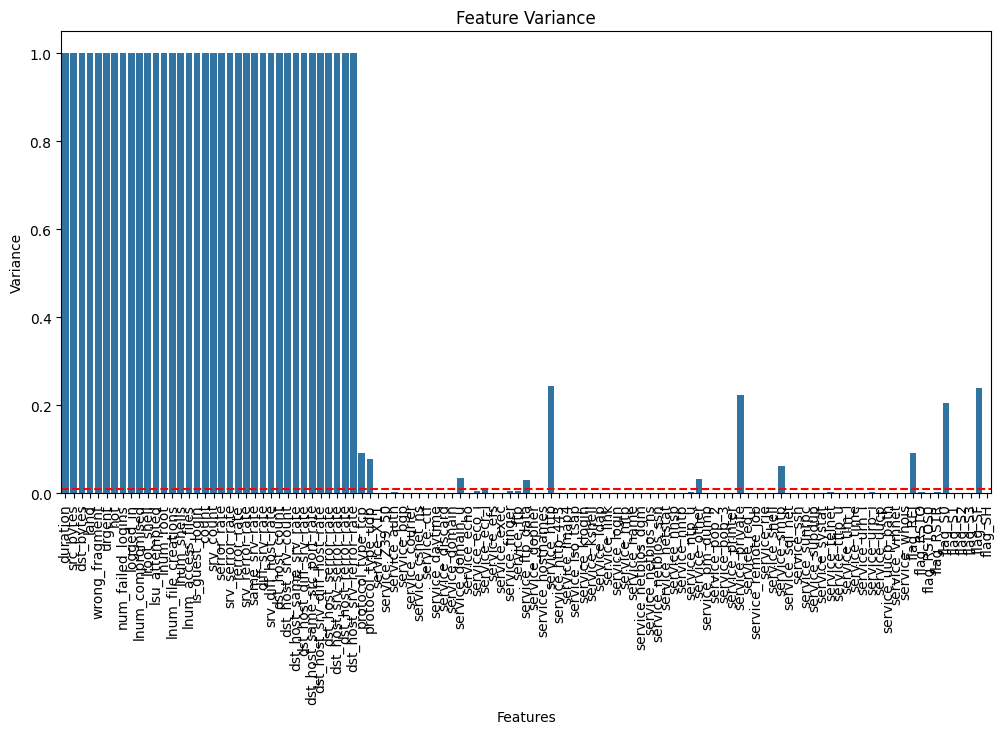

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the variance of each feature
variances = normalized_df.var()

# Plot the variance
plt.figure(figsize=(12, 6))
sns.barplot(x=variances.index, y=variances.values)
plt.xticks(rotation=90)
plt.title('Feature Variance')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.axhline(y=0.01, color='r', linestyle='--')  # Add a line for the threshold
plt.show()


## For better feature selection we are aiming to minimise the numer of features, here we are using variance where we can basically remove features with variance less than 0.01.

In [34]:
import pandas as pd

# Convert the normalized_data to a DataFrame if it's still a NumPy array
normalized_df = pd.DataFrame(normalized_data, columns=all_feature_names)

# Calculate the variance for each numeric feature
variances = normalized_df.var()

# Identify features with low variance (e.g., less than 0.01)
low_variance_features = variances[variances < 0.01]

# Get the count of unique values for these low variance features
low_variance_counts = normalized_df[low_variance_features.index].nunique()

# Create a DataFrame to show the variance and unique value count for low variance features
low_variance_summary = pd.DataFrame({
    'Variance': low_variance_features,
    'Unique Count': low_variance_counts
})

# Display the summary of features with low variance
print("Features with low variance:")
print(low_variance_summary)


Features with low variance:
                 Variance  Unique Count
service_X11      0.000076             2
service_Z39_50   0.000625             2
service_auth     0.002248             2
service_bgp      0.000714             2
service_courier  0.000741             2
...                   ...           ...
flag_RSTR        0.002911             2
flag_S1          0.000391             2
flag_S2          0.000165             2
flag_S3          0.000069             2
flag_SH          0.000233             2

[66 rows x 2 columns]


In [35]:
# Set a variance threshold
threshold = 0.01

# Identify features to drop based on low variance
features_to_drop = low_variance_summary[low_variance_summary['Variance'] < threshold].index

# Drop the identified features from the dataset
df_cleaned = normalized_df.drop(columns=features_to_drop)

print(f"Removed {len(features_to_drop)} low variance features.")
print("Remaining features:")
print(df_cleaned.columns)


Removed 66 low variance features.
Remaining features:
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'lnum_compromised',
       'lroot_shell', 'lsu_attempted', 'lnum_root', 'lnum_file_creations',
       'lnum_shells', 'lnum_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_tcp',
       'protocol_type_udp', 'service_domain_u', 'service_ftp_data',
       'service_http', 'service_other', 'service_private', 'service_smtp',
       'flag_REJ', 'flag_S0', 'flag_SF'],
  

In [36]:
df_cleaned.shape

(145585, 47)

## To remove further unnecessary features and avoid multicolinearity we are gonna use correlation heatmap where we can aiming to remove features with corr value greater than 0.9 which is absolute value(either positive or negative).

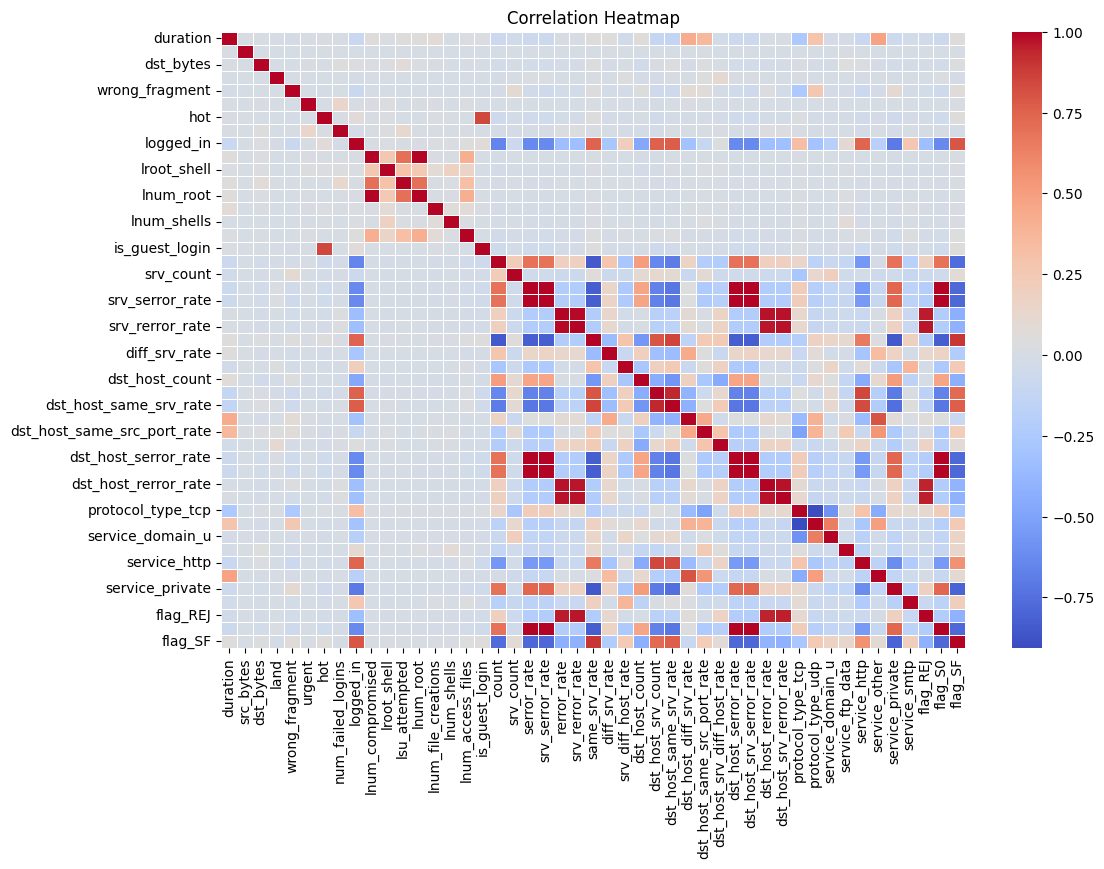

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [38]:
import numpy as np

# Set a correlation threshold (e.g., 0.9 for high positive or negative correlations)
threshold = 0.9

# Find the correlation matrix
correlation_matrix = df_cleaned.corr().abs()  # Use absolute values to capture both positive and negative correlations

# Create a boolean mask to identify correlations greater than the threshold
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
high_corr_pairs = correlation_matrix.where(upper_triangle).stack()

# Filter the pairs with correlation above the threshold
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]

# Display highly correlated feature pairs
print("Highly correlated feature pairs (correlation > 0.9):")
print(high_corr_pairs)


Highly correlated feature pairs (correlation > 0.9):
lnum_compromised          lnum_root                   0.994215
serror_rate               srv_serror_rate             0.996363
                          dst_host_serror_rate        0.996843
                          dst_host_srv_serror_rate    0.995152
                          flag_S0                     0.994955
srv_serror_rate           dst_host_serror_rate        0.995122
                          dst_host_srv_serror_rate    0.998351
                          flag_S0                     0.997991
rerror_rate               srv_rerror_rate             0.991317
                          dst_host_rerror_rate        0.975514
                          dst_host_srv_rerror_rate    0.972614
                          flag_REJ                    0.961397
srv_rerror_rate           dst_host_rerror_rate        0.967375
                          dst_host_srv_rerror_rate    0.975105
                          flag_REJ                    0.963062
sa

## Further more we can remove the features based on variance inflation factor (VIF) which should be below 10. So, if we notice any extreme value of VIF we can remove that feature.

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Calculate VIF for each feature
X = df_cleaned.values  # Convert DataFrame to NumPy array
vif_data = pd.DataFrame()
vif_data["Feature"] = df_cleaned.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)


                        Feature         VIF
0                      duration    1.461579
1                     src_bytes    1.006718
2                     dst_bytes    1.023527
3                          land    1.063654
4                wrong_fragment    1.610419
5                        urgent    1.028772
6                           hot    3.645741
7             num_failed_logins    1.101683
8                     logged_in   28.217392
9              lnum_compromised   96.065430
10                  lroot_shell    1.160862
11                lsu_attempted    2.111243
12                    lnum_root   94.793490
13          lnum_file_creations    1.037445
14                  lnum_shells    1.044019
15            lnum_access_files    1.229330
16               is_guest_login    4.006265
17                        count    5.594339
18                    srv_count    1.820580
19                  serror_rate  342.331657
20              srv_serror_rate  600.675139
21                  rerror_rate 

## After proper analyzing the resulting features from correlation heatmap and VIF factor, we can see that some features are seem common in these both criterion, hence we can remove these features without any hesitation.

In [40]:
# List of features to drop
features_to_drop = [
    'lnum_compromised', 'srv_serror_rate', 'srv_rerror_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'flag_S0', 'flag_SF'
]

# Drop the features from the DataFrame
final_df = df_cleaned.drop(columns=features_to_drop)

# Display the final DataFrame
print(final_df.columns)


Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_tcp',
       'protocol_type_udp', 'service_domain_u', 'service_ftp_data',
       'service_http', 'service_other', 'service_private', 'service_smtp',
       'flag_REJ'],
      dtype='object')


In [41]:
final_df.shape

(145585, 40)

In [42]:
df_label.unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

## We have to convert the probelm into binary classification from Multiclass classification problem.

In [43]:
# Assuming df_label is a Series containing your labels
df_label = df_label.apply(lambda x: 'normal' if x == 'normal' else 'attack')

# Check the new distribution of labels
print(df_label.value_counts())



label
normal    87831
attack    57754
Name: count, dtype: int64


In [ ]:

df_label = df_label.map({'normal': 0, 'attack': 1})

# Check the unique values to confirm
print(df_label.unique())


In [45]:

final_df['label'] = df_label.values  # Adding the label column to the transformed DataFrame

# Check the first few rows to ensure the merge was successful
print(final_df.head())


   duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0 -0.107851  -0.004293   0.042595 -0.011722       -0.084394 -0.004737   
1 -0.107851  -0.004261  -0.039036 -0.011722       -0.084394 -0.004737   
2 -0.107851  -0.004263  -0.025042 -0.011722       -0.084394 -0.004737   
3 -0.107851  -0.004272  -0.025042 -0.011722       -0.084394 -0.004737   
4 -0.107851  -0.004273  -0.013613 -0.011722       -0.084394 -0.004737   

       hot  num_failed_logins  logged_in  lroot_shell  ...  protocol_type_tcp  \
0 -0.07021          -0.018022   1.017175     -0.01944  ...                1.0   
1 -0.07021          -0.018022   1.017175     -0.01944  ...                1.0   
2 -0.07021          -0.018022   1.017175     -0.01944  ...                1.0   
3 -0.07021          -0.018022   1.017175     -0.01944  ...                1.0   
4 -0.07021          -0.018022   1.017175     -0.01944  ...                1.0   

   protocol_type_udp  service_domain_u  service_ftp_data  service_http  \


## It's essential to visualize the label distribution as extreme imbalance like 70:30, 20:80 may seriously disturbe the results or introduce the bias.

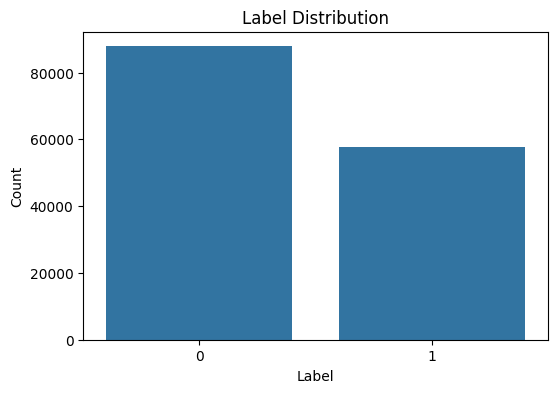

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=final_df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


## As distribution seems valid we can proceed without balancing.

In [47]:
# Check label distribution
print(final_df['label'].value_counts())

# For percentage distribution
print(final_df['label'].value_counts(normalize=True) * 100)


label
0    87831
1    57754
Name: count, dtype: int64
label
0    60.329704
1    39.670296
Name: proportion, dtype: float64


## As we are aiming to develop an API we cannot take more than say 10 inputs from users as it won't be effective from their end so we can try our best to end up with minimum but with most important features.
## At first we will go with PCA method in which using variance we can see how may features endup with contributing to 95% of the total variance if they are around 10 features we can go with this method or else we need to investigate further more methods.

Cumulative explained variance by principal components:
Component 1: 0.1883
Component 2: 0.2889
Component 3: 0.3579
Component 4: 0.4231
Component 5: 0.4819
Component 6: 0.5224
Component 7: 0.5606
Component 8: 0.5969
Component 9: 0.6326
Component 10: 0.6640
Component 11: 0.6953
Component 12: 0.7261
Component 13: 0.7565
Component 14: 0.7864
Component 15: 0.8146
Component 16: 0.8416
Component 17: 0.8681
Component 18: 0.8925
Component 19: 0.9135
Component 20: 0.9298
Component 21: 0.9440
Component 22: 0.9555
Component 23: 0.9644
Component 24: 0.9731
Component 25: 0.9808
Component 26: 0.9854
Component 27: 0.9899
Component 28: 0.9919
Component 29: 0.9937
Component 30: 0.9951
Component 31: 0.9963
Component 32: 0.9972
Component 33: 0.9980
Component 34: 0.9987
Component 35: 0.9992
Component 36: 0.9995
Component 37: 0.9997
Component 38: 0.9998
Component 39: 0.9999
Component 40: 1.0000

Number of components needed to reach 95% variance: 22


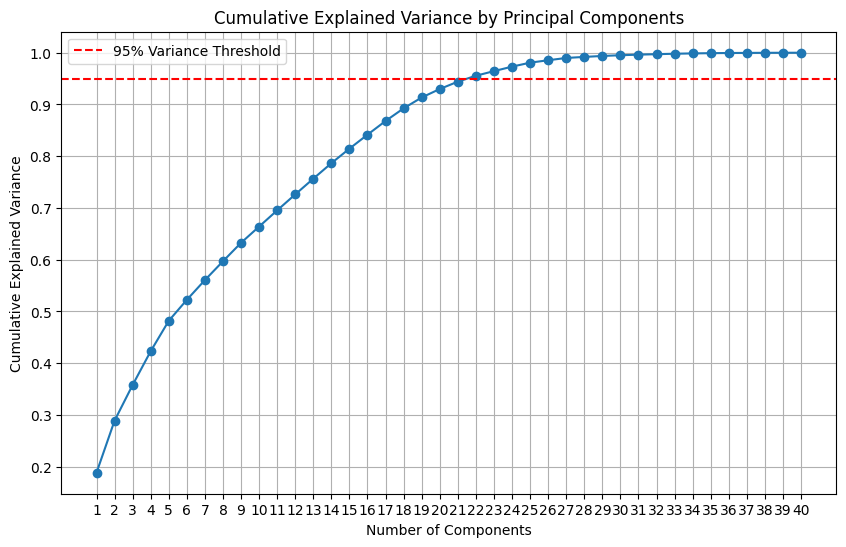

In [48]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = final_df.drop(columns=['label'])  # Exclude the target variable
y = final_df['label']  # Target variable

# Step 1: Apply PCA directly on the data
pca = PCA()
pca.fit(X)

# Step 2: Analyze explained variance
explained_variance = pca.explained_variance_ratio_

# Step 3: Calculate cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Print the cumulative explained variance
print("Cumulative explained variance by principal components:")
for i, variance in enumerate(cumulative_variance):
    print(f"Component {i + 1}: {variance:.4f}")

# Step 4: Determine the number of components needed for 95% variance
n_components_95 = (cumulative_variance < 0.95).sum() + 1  # +1 to include the component that reaches 95%

print(f"\nNumber of components needed to reach 95% variance: {n_components_95}")

# Optional: Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.legend()
plt.show()


## As per PCA methods we are getting 22 features which seems to be important we are focusing on 95% variance so we can decide to use another method like RandomForestClassifier to predict importance features as per our requirment.

In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = final_df.drop(columns=['label'])  # Exclude the target column
y = final_df['label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select the top 10 most important features
top_10_features = feature_importances.head(10)

# Print the top 10 features
print("Top 10 Features by Importance:")
print(top_10_features)

# If you want to use these top 10 features for further analysis or model training:
X_top_10 = X[top_10_features['Feature'].values]

# Display the selected top 10 features
print("\nTop 10 features dataset:")
print(X_top_10.head())


Top 10 Features by Importance:
                   Feature  Importance
20           same_srv_rate    0.155776
16                   count    0.147996
1                src_bytes    0.096207
21           diff_srv_rate    0.094394
24      dst_host_srv_count    0.075083
37         service_private    0.072664
25  dst_host_same_srv_rate    0.056925
18             serror_rate    0.045017
2                dst_bytes    0.044023
26  dst_host_diff_srv_rate    0.042294

Top 10 features dataset:
   same_srv_rate     count  src_bytes  diff_srv_rate  dst_host_srv_count  \
0       0.771739 -0.661639  -0.004293      -0.337022           -1.054233   
1       0.771739 -0.661639  -0.004261      -0.337022           -0.967059   
2       0.771739 -0.661639  -0.004263      -0.337022           -0.879886   
3       0.771739 -0.681573  -0.004272      -0.337022           -0.792713   
4       0.771739 -0.681573  -0.004273      -0.337022           -0.705540   

   service_private  dst_host_same_srv_rate  serror_rate  

## Now we will try several machine learning algorithms like Gradient decent based algorithms, Distance based algorithms and Tree based algorithms and see whichever gives better results by using the evalution matrix and accuracy.

--- Logistic Regression ---
Accuracy: 0.9761

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17584
           1       0.99      0.95      0.97     11533

    accuracy                           0.98     29117
   macro avg       0.98      0.97      0.97     29117
weighted avg       0.98      0.98      0.98     29117



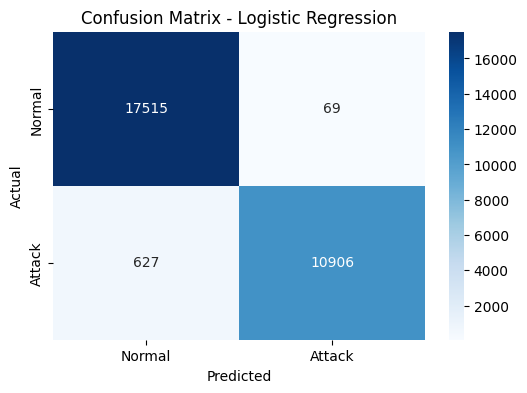

--- Decision Tree ---
Accuracy: 0.9987

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17584
           1       1.00      1.00      1.00     11533

    accuracy                           1.00     29117
   macro avg       1.00      1.00      1.00     29117
weighted avg       1.00      1.00      1.00     29117



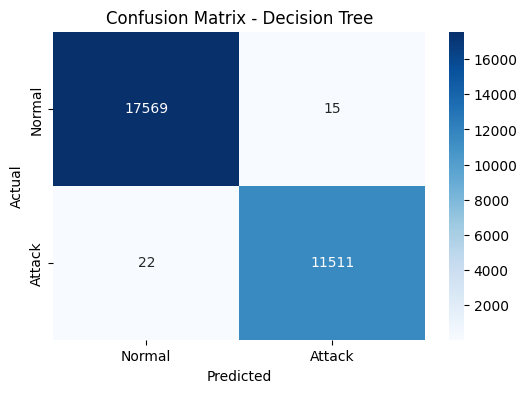

--- Random Forest ---
Accuracy: 0.9991

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17584
           1       1.00      1.00      1.00     11533

    accuracy                           1.00     29117
   macro avg       1.00      1.00      1.00     29117
weighted avg       1.00      1.00      1.00     29117



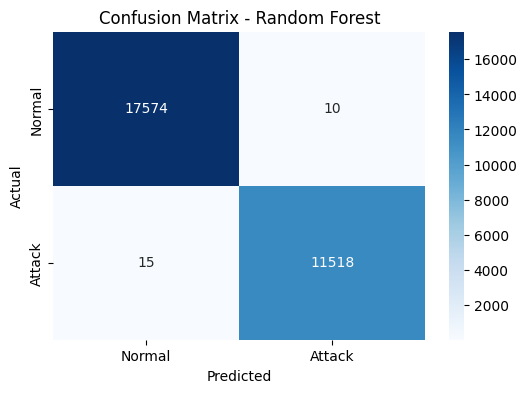

--- SVM ---
Accuracy: 0.9779

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17584
           1       1.00      0.95      0.97     11533

    accuracy                           0.98     29117
   macro avg       0.98      0.97      0.98     29117
weighted avg       0.98      0.98      0.98     29117



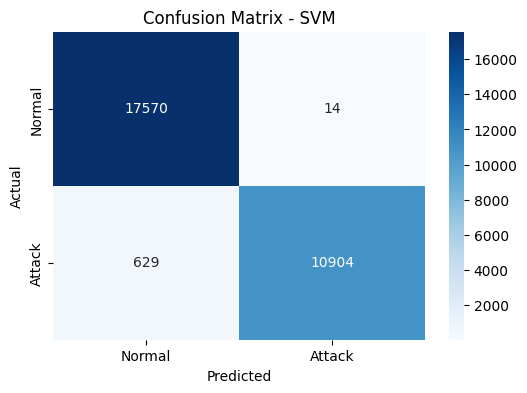

--- KNN ---
Accuracy: 0.9887

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     17584
           1       0.99      0.98      0.99     11533

    accuracy                           0.99     29117
   macro avg       0.99      0.99      0.99     29117
weighted avg       0.99      0.99      0.99     29117



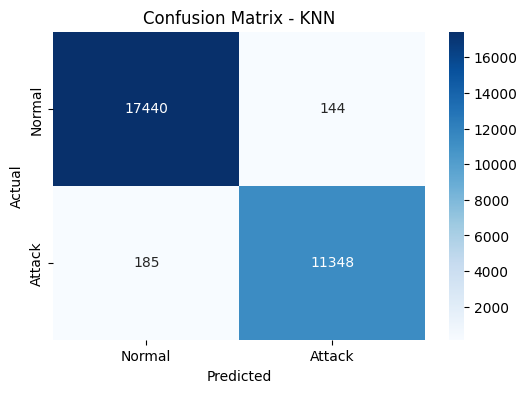

--- Gradient Boosting ---
Accuracy: 0.9981

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17584
           1       1.00      1.00      1.00     11533

    accuracy                           1.00     29117
   macro avg       1.00      1.00      1.00     29117
weighted avg       1.00      1.00      1.00     29117



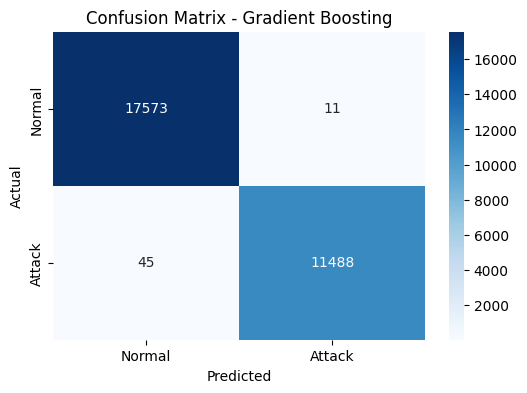

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_10, y, test_size=0.2, random_state=42)

# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Function to train, predict, and evaluate each classifier
for name, clf in classifiers.items():
    print(f"--- {name} ---")

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


## Now almost all algorithms works very fine with high accuracy but among them Random forest is particularly shows best results as per confusion matrix where it shows very few False negative and highest accuracy.

Accuracy: 0.9991

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17584
           1       1.00      1.00      1.00     11533

    accuracy                           1.00     29117
   macro avg       1.00      1.00      1.00     29117
weighted avg       1.00      1.00      1.00     29117



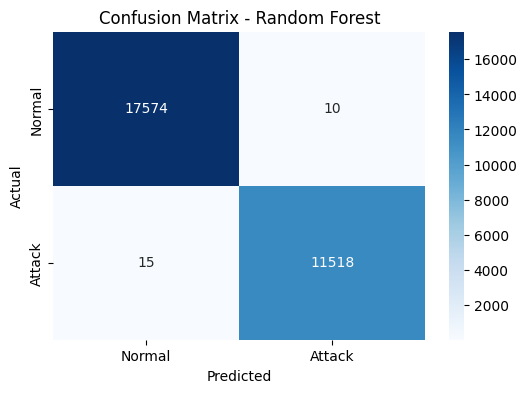

Random Forest model saved successfully!


In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_10, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Step 3: Train the Random Forest model
rf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = rf.predict(X_test)

# Step 5: Evaluate the Random Forest model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Step 6: Save the trained Random Forest model to a file for API use
# Save the model using joblib
joblib.dump(rf, 'random_forest_model_10.pkl')

print("Random Forest model saved successfully!")


In [52]:
print(type('random_forest_model.pkl'))

<class 'str'>


In [53]:
print(type(rf))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [54]:
X_test.shape

(29117, 10)

In [56]:
import pickle
model = pickle.load(open('random_forest_model_10.pkl', 'rb'))
print(f"Model type: {type(model)}")


Model type: <class 'numpy.ndarray'>


In [59]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Assume your trained model is named rf_model
with open('random_forest_model_10_final.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [60]:
model = pickle.load(open('random_forest_model_10_final.pkl', 'rb'))
print(f"Model type: {type(model)}")

Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
